- Default PSO parameters
- max_back=20

In [1]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
import symreg
from gpbenchmarks import get_data

from experiment_settings import nguyen7_funset, pagie_funset, keijzer_funset, korns12_funset, vlad_funset

def plot_results(name, outs):
    print(name)
    costs = np.array(outs)
    print('min:', np.min(costs))
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    plt.figure()
    plt.title(name)
    sns.distplot(costs, kde=False);
    

def run_experiment(data_item, cost_function):
    results = []
    genes = []
    
    name, (x_train, y_train, x_test, y_test), params = data_item
    print(name)
    
    bounds = tengp.individual.IndividualBuilder(params).create().bounds[:]
    
    prob = pg.problem(cost_function(np.c_[x_train, np.ones(len(x_train))], y_train, params, bounds))
    
    pg.set_global_rng_seed(42)
    
    for i in range(100):
        print(i, end=',')
        algo = pg.algorithm(pg.pso(gen=2000))
        algo.set_verbosity(1)
        pop = pg.population(prob, 50)
        pop = algo.evolve(pop)
        results.append(pop.champion_f[0])
        genes.append(pop.champion_x)
    
    return results, genes

In [2]:
import pygmo as pg

class cost_function:
    def __init__(self, X, Y, params, bounds):
        self.params = params
        self.bounds = bounds
        self.X = X
        self.Y = Y
    
    def fitness(self, x):      
        individual = tengp.individual.NPIndividual(list(x), self.bounds, self.params)
        
        pred = individual.transform(self.X)
        
        try:
            return [mean_squared_error(pred, self.Y)]
        except ValueError:
            return [10000000000]
        
    def get_bounds(self):
        return self.bounds

In [3]:
kw_params = {'real_valued': True, 'max_back': 20}

params_nguyen4 = tengp.Parameters(2, 1, 1, 50, nguyen7_funset, **kw_params)
params_nguyen7 = tengp.Parameters(2, 1, 1, 50, nguyen7_funset, **kw_params)
params_nguyen10 = tengp.Parameters(3, 1, 1, 50, nguyen7_funset, **kw_params)
params_pagie1  = tengp.Parameters(2, 1, 1, 50, pagie_funset, **kw_params)
params_keijzer6 = tengp.Parameters(2, 1, 1, 50, keijzer_funset, **kw_params)
params_korns = tengp.Parameters(6, 1, 1, 50, korns12_funset, **kw_params)
params_vlad = tengp.Parameters(6, 1, 1, 50, vlad_funset, **kw_params)

all_params = [params_nguyen7, params_pagie1, params_keijzer6, params_korns, params_vlad]

In [4]:
import random 

data = [
    ('nguyen4', symreg.get_benchmark_poly(random, 6), params_nguyen4),
    ('nguyen7', symreg.get_benchmark_nguyen7(random, None), params_nguyen7),
    ('nguyen10', symreg.get_benchmark_nguyen10(random, None), params_nguyen10),
    ('pagie1', symreg.get_benchmark_pagie1(random, None), params_pagie1),
    ('keijzer6', symreg.get_benchmark_keijzer(random, 6), params_keijzer6),
    ('korns12', symreg.get_benchmark_korns(random, 12), params_korns),
    ('vladislasleva4', symreg.get_benchmark_vladislasleva4(random, None), params_vlad)
]

# Nguyen 4

In [5]:
%%time

ng4_res, ng4_genes = run_experiment(data[0], cost_function)

nguyen4
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,CPU times: user 2h 46min 47s, sys: 6.03 s, total: 2h 46min 53s
Wall time: 2h 46min 58s


In [12]:
import pickle

pickle.dump(ng4_res, open('ng4_res_100_000evals', 'wb'))
pickle.dump(ng4_genes, open('ng4_genes_100_000evals', 'wb'))

nguyen4
min: 3.4543807352239238e-06
mean: 0.0027664605518296632
median: 0.00023708596907299231
variance: 0.00047298471420793403


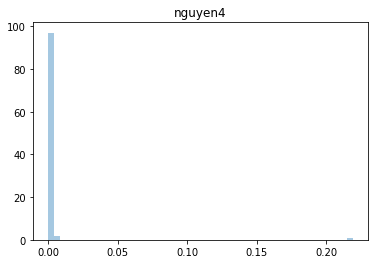

In [13]:
plot_results('nguyen4', ng4_res)

# Nguyen 7


In [ ]:
%%time

ng7_res, ng7_genes = run_experiment(data[1], cost_function)

In [ ]:
pickle.dump(ng7_res, open('ng7_res_100_000evals', 'wb'))
pickle.dump(ng7_genes, open('ng7_genes_100_000evals', 'wb'))

In [ ]:
plot_results('nguyen7', ng7_res)

# Nguyen 10

In [14]:
%%time

ng10_res, ng10_genes = run_experiment(data[2], cost_function)

nguyen10
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,

/home/jarino/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,CPU times: user 2h 58min 36s, sys: 6.33 s, total: 2h 58min 42s
Wall time: 2h 58min 46s


In [16]:
pickle.dump(ng10_res, open('ng10_res_100_000evals', 'wb'))
pickle.dump(ng10_genes, open('ng10_genes_100_000evals', 'wb'))

nguyen10
min: 1.0716956828762855e-05
mean: 0.010840454761035501
median: 0.009116454754603985
variance: 0.0001175711988379833


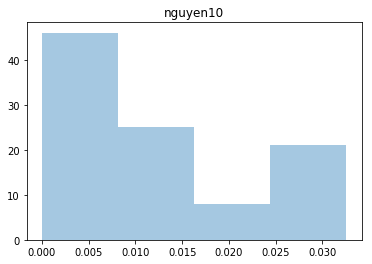

In [17]:
plot_results(data[2][0], ng10_res)

# Pagie

In [15]:
%%time

pag1_res, pag1_genes = run_experiment(data[3], cost_function)

pagie1
0,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in multiply
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in power
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: overflow encountered in multiply
  u = a*

1,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:41: RuntimeWarning: overflow encountered in reciprocal
  return x**(-1)


2,

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


3,4,5,6,7,

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/jarino/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:126: RuntimeWarning: overflow encountered in add
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value


41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


90,91,92,93,94,95,96,97,98,99,CPU times: user 2h 45min 13s, sys: 5.97 s, total: 2h 45min 19s
Wall time: 2h 45min 22s


In [18]:
pickle.dump(pag1_res, open('pag1_res_100_000evals', 'wb'))
pickle.dump(pag1_genes, open('pag1_genes_100_000evals', 'wb'))

pagie1
min: 0.008458631009969676
mean: 0.13140485143801384
median: 0.11831636882627897
variance: 0.055730687572586216


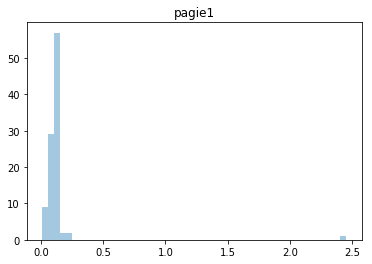

In [20]:
plot_results(data[3][0], pag1_res)

# Keijzer 6

keijzer6
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)


1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,

/home/jarino/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:41: RuntimeWarning: divide by zero encountered in reciprocal
  return x**(-1)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in multiply
  u = a*f_u(L, U)


47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:100: RuntimeWarning: invalid value encountered in multiply
  L = (1-b)*x_l1 + b*x_u1
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:126: RuntimeWarning: invalid value encountered in add
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value


64,65,66,67,68,69,70,71,72,73,74,75,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: invalid value encountered in multiply
  U = (1-c)*x_l2 + c*x_u2


76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:104: RuntimeWarning: invalid value encountered in add
  return l + u


93,94,95,96,97,98,99,keijzer6
min: 2.9376270454694414e-08
mean: 1.1090771514422182e-05
median: 3.2187613879084634e-06
variance: 5.374076231960081e-10
CPU times: user 2h 44min 22s, sys: 6.08 s, total: 2h 44min 28s
Wall time: 2h 44min 33s


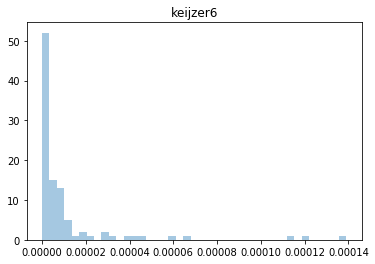

In [22]:
%%time

kei6_res, kei6_genes = run_experiment(data[4], cost_function)

pickle.dump(kei6_res, open('kei6_res_100_000evals', 'wb'))
pickle.dump(kei6_genes, open('kei6_genes_100_000evals', 'wb'))

plot_results(data[4][0], kei6_res)

# Korns 12

korns12
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:38: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:23: RuntimeWarning: overflow encountered in square
  return x**2
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:26: RuntimeWarning: overflow encountered in power
  return x**3
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:104: RuntimeWarning: invalid value encountered in add
  return l + u
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:14: Runt

1,

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


2,3,4,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:126: RuntimeWarning: overflow encountered in add
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value


5,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: overflow encountered in subtract
  u = a*f_u(L, U)


6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in subtract
  l = (1-a)*f_l(L, U)


32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,korns12
min: 0.0
mean: 16.07586695008114
median: 11.992213536488235
variance: 210.0884902152564


ValueError: color kwarg must have one color per dataset

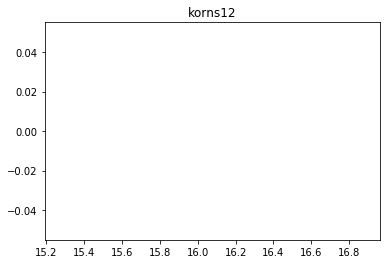

In [23]:
%%time

korns12_res, korns12_genes = run_experiment(data[5], cost_function)

pickle.dump(korns12_res, open('korns12_res_100_000evals', 'wb'))
pickle.dump(korns12_genes, open('korns12_genes_100_000evals', 'wb'))

korns12
min: 1.1148676730098042
mean: 1.1285604559733897
median: 1.116957241458393
variance: 0.0070690219606243


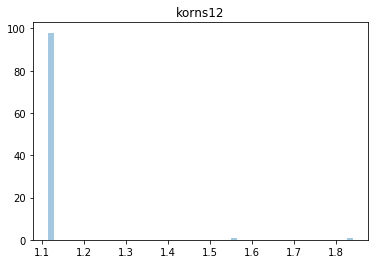

In [27]:
plot_results(data[5][0], korns12_res)

# Vladislasleva 4

vladislasleva4
0,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in power
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:38: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: overflow encountered in power
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:14: RuntimeWarning: invalid value encoun

1,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: overflow encountered in subtract
  u = a*f_u(L, U)


2,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:41: RuntimeWarning: overflow encountered in reciprocal
  return x**(-1)


3,4,5,6,7,8,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: overflow encountered in add
  u = a*f_u(L, U)


9,10,11,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:126: RuntimeWarning: overflow encountered in add
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value


12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,vladislasleva4
min: 0.0
mean: 15.846739207132533
median: 10.0
variance: 217.88162408752802


ValueError: color kwarg must have one color per dataset

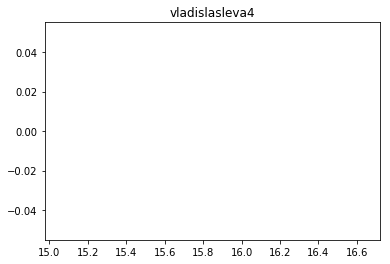

In [24]:
%%time

vlad4_res, vlad4_genes = run_experiment(data[6], cost_function)

pickle.dump(vlad4_res, open('vlad4_res_100_000evals', 'wb'))
pickle.dump(vlad4_genes, open('vlad4_genes_100_000evals', 'wb'))

vladislasleva4
min: 0.006669941726488991
mean: 0.02086267761961651
median: 0.02096324782892548
variance: 2.0947488559178296e-05


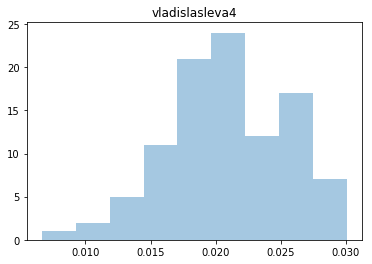

In [26]:
plot_results(data[6][0], vlad4_res)

# Rounding of results

In [ ]:
rounded_results = []

chunk = 100
for i, (name, (x_train, y_train, x_test, y_test), params) in zip(range(5), data):
    problem_results = []
    
    x_train = np.c_[x_train, np.ones(len(x_train))]
        
    bounds = tengp.individual.IndividualBuilder(params).create().bounds
    
    print(name)
    
    for genes in champions[chunk*i:chunk*i + chunk]:
        
        individual = params.individual_class(np.round(genes), bounds, params)
        
        output = individual.transform(x_train)
        
        try:
            problem_results.append(mean_squared_error(output, y_train))
        except ValueError:
            print('value error')
    
    rounded_results.append(problem_results)
        
        

In [ ]:
np.min(rounded_results[4])